# Data visualization, pt. 2 (`seaborn`)

## Goals of this exercise

- Introducting `seaborn`. 
- Putting `seaborn` into practice:
  - **Univariate** plots (histograms).  
  - **Bivariate** continuous plots (scatterplots and line plots).
  - **Bivariate** categorical plots (bar plots, box plots, and strip plots).

## Introducing `seaborn`

### What is `seaborn`?

> [`seaborn`](https://seaborn.pydata.org/) is a data visualization library based on `matplotlib`.

- In general, it's easier to make nice-looking graphs with `seaborn`.
- The trade-off is that `matplotlib` offers more flexibility.

In [1]:
import seaborn as sns ### importing seaborn
import pandas as pd
import matplotlib.pyplot as plt ## just in case we need it
import numpy as np

In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

### The `seaborn` hierarchy of plot types

We'll learn more about exactly what this hierarchy means today (and in next lecture).

![title](img/seaborn_library.png)

### Example dataset

Today we'll work with a new dataset, from [Gapminder](https://www.gapminder.org/data/documentation/). 

- **Gapminder** is an independent Swedish foundation dedicated to publishing and analyzing data to correct misconceptions about the world.
- Between 1952-2007, has data about `life_exp`, `gdp_cap`, and `population`.

In [3]:
df_gapminder = pd.read_csv("data/gapminder_full.csv")

In [4]:
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [5]:
df_gapminder.shape

(1704, 6)

## Univariate plots

> A **univariate plot** is a visualization of only a *single* variable, i.e., a **distribution**.

![title](img/displot.png)

### Histograms with `sns.histplot`

- We've produced histograms with `plt.hist`.  
- With `seaborn`, we can use `sns.histplot(...)`.

Rather than use `df['col_name']`, we can use the syntax:

```python
sns.histplot(data = df, x = col_name)
```

This will become even more useful when we start making **bivariate plots**.

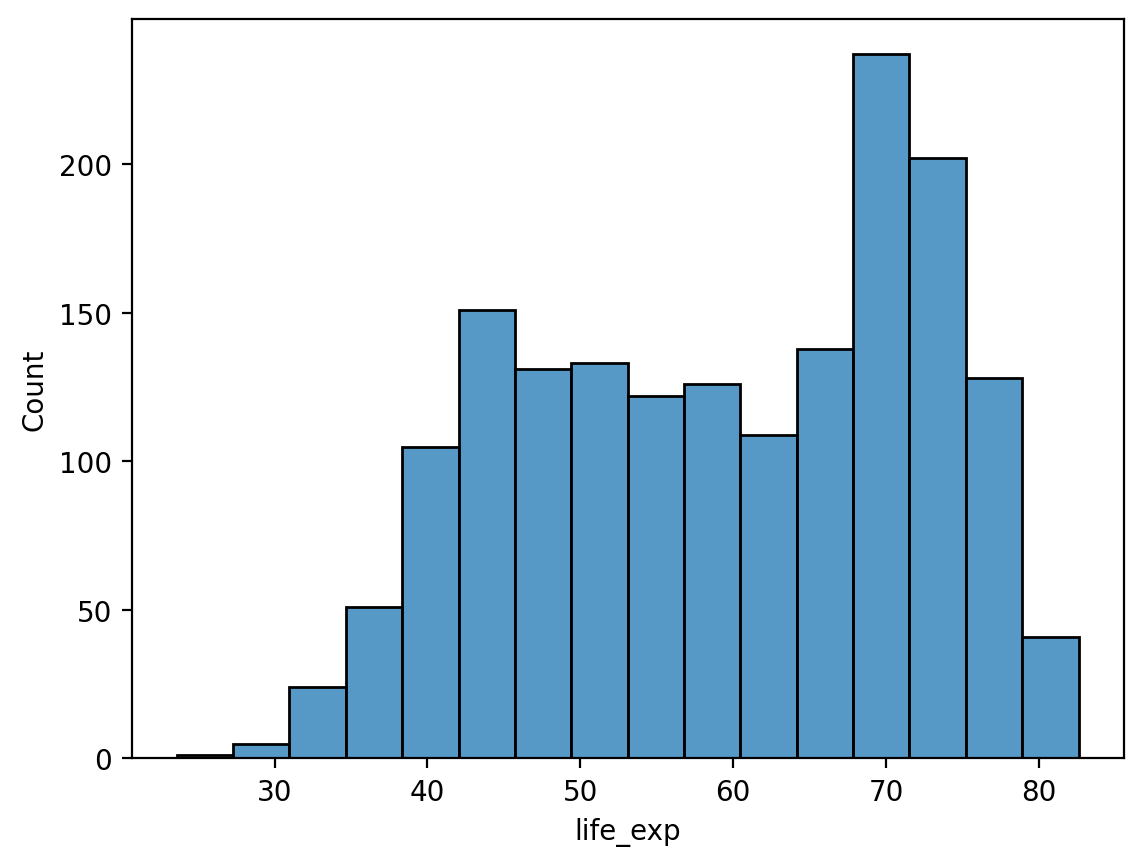

In [6]:
# Histogram of life expectancy
sns.histplot(df_gapminder['life_exp']);

#### Modifying the number of bins

As with `plt.hist`, we can modify the number of *bins*.

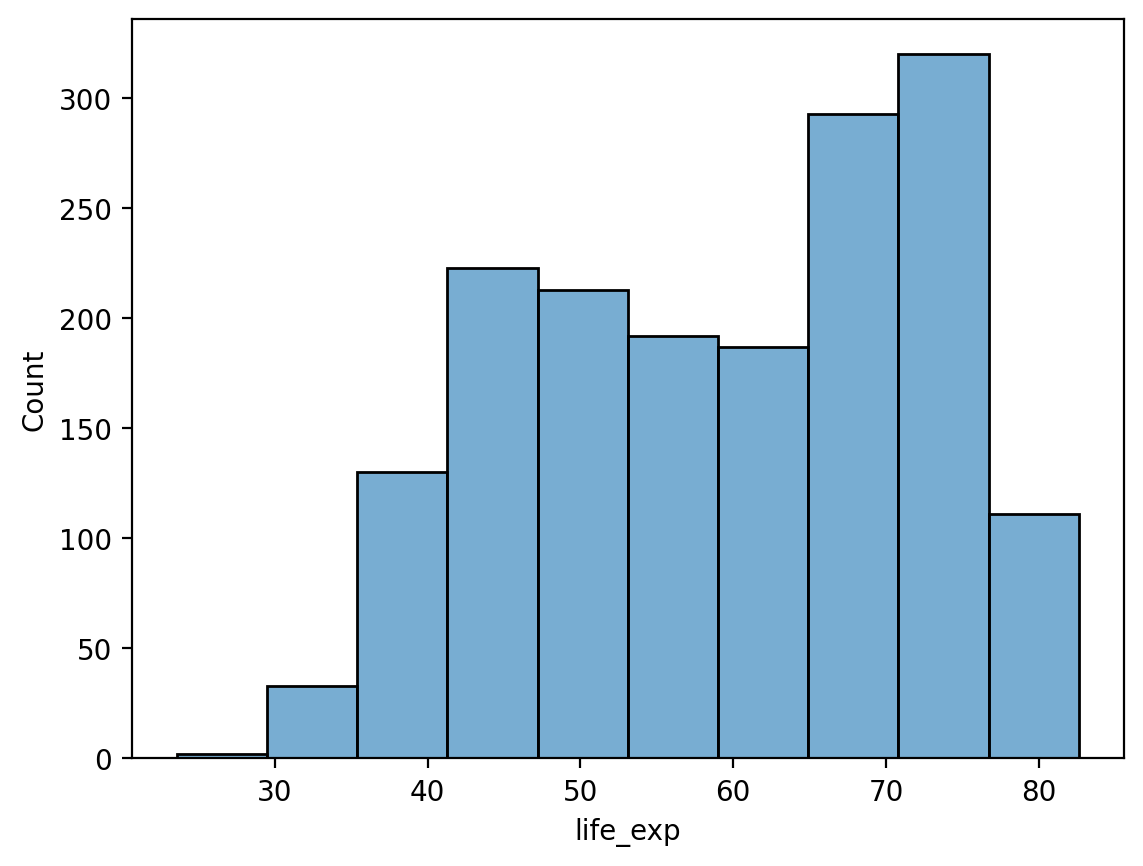

In [7]:
# Fewer bins
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 10, alpha = .6);

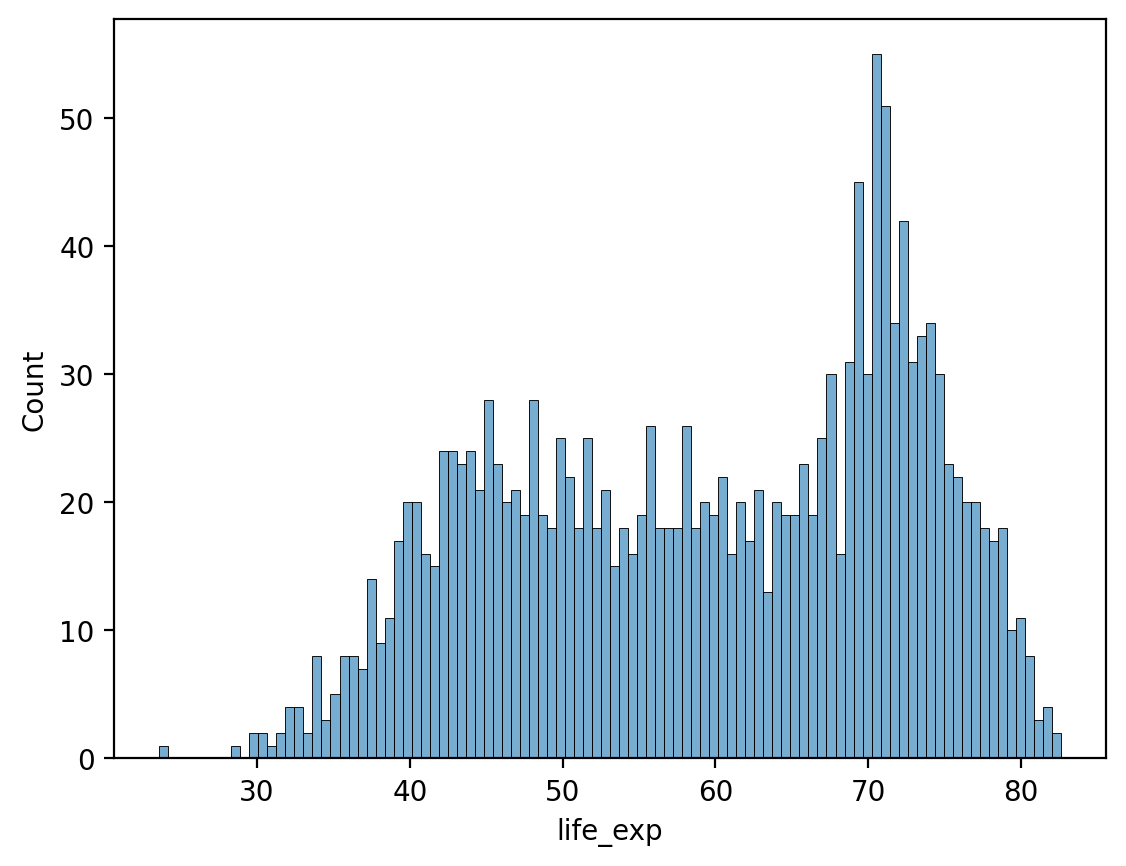

In [8]:
# Many more bins!
sns.histplot(data = df_gapminder, x = 'life_exp', bins = 100, alpha = .6);

#### Modifying the y-axis with `stat`

By default, `sns.histplot` will plot the **count** in each bin. However, we can change this using the `stat` parameter:

- `probability`: normalize such that bar heights sum to `1`.
- `percent`: normalize such that bar heights sum to `100`.
- `density`: normalize such that total *area* sums to `1`.


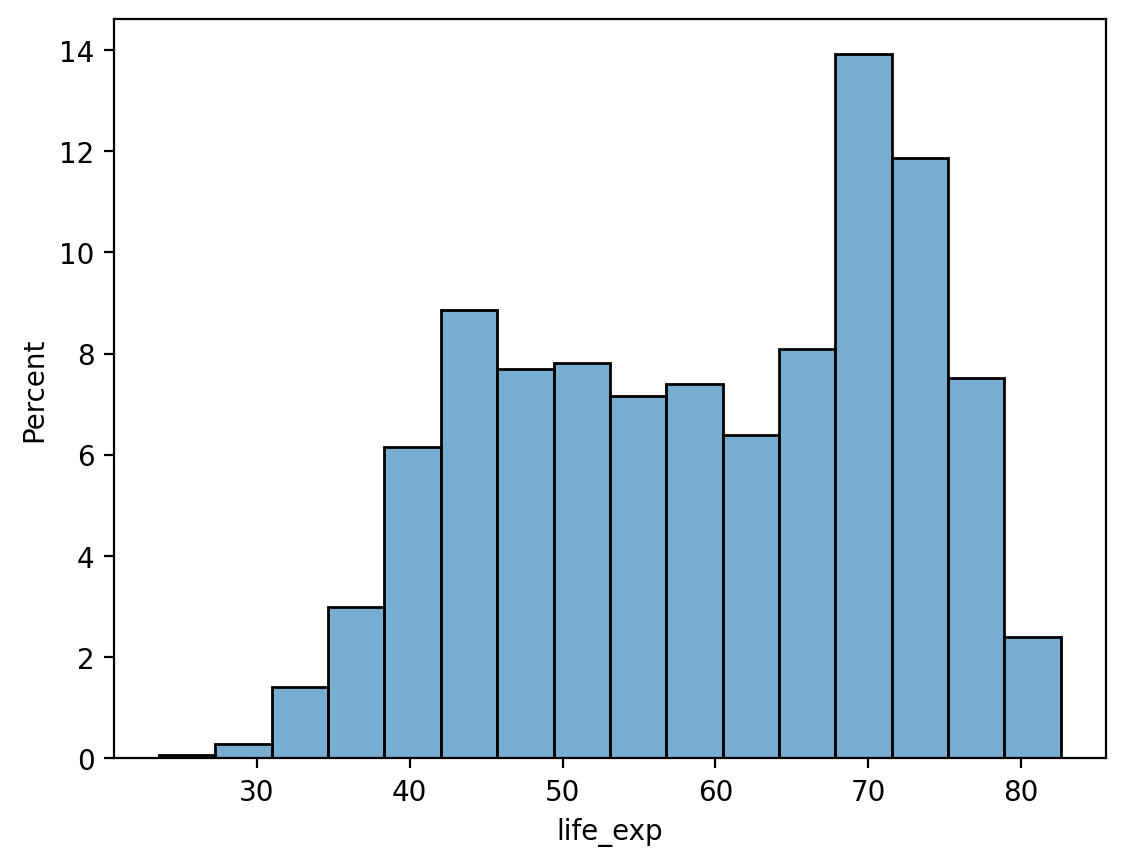

In [9]:
# Note the modified y-axis!
sns.histplot(data = df_gapminder, x = 'life_exp', stat = "percent", alpha = .6);

### Check-in

How would you make a histogram showing the distribution of `population` values in `2007` alone? 

- Bonus 1: Modify this graph to show `probability`, not `count`.
- Bonus 2: What do you notice about this graph, and how might you change it?

In [36]:
### Your code here

## Bivariate continuous plots

> A **bivariate continuous plot** visualizes the relationship between *two continuous variables*.

![title](img/seaborn_relplot.png)

### Scatterplots with `sns.scatterplot`

> A **scatterplot** visualizes the relationship between two continuous variables.

- Each observation is plotted as a single dot/mark. 
- The position on the `(x, y)` axes reflects the value of those variables.

One way to make a scatterplot in `seaborn` is using `sns.scatterplot`.

#### Showing `gdp_cap` by `life_exp`

What do we notice about `gdp_cap`?

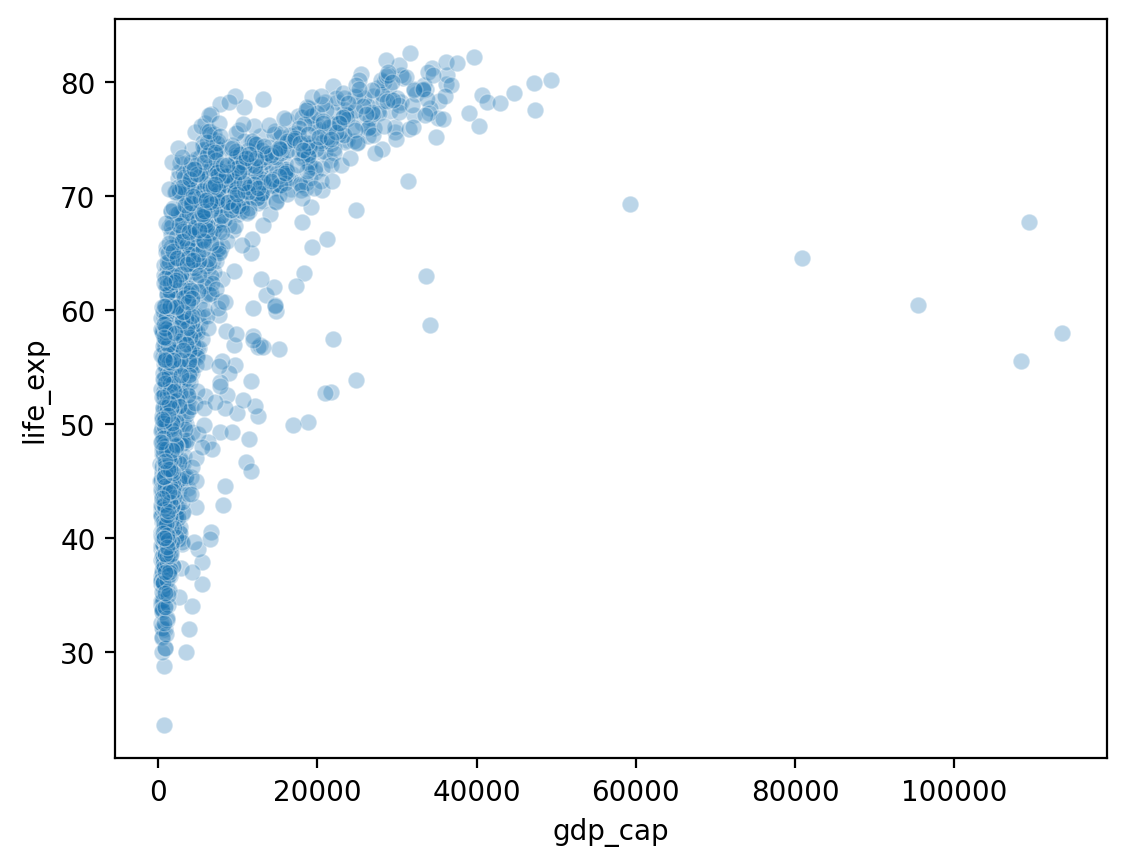

In [11]:
sns.scatterplot(data = df_gapminder, x = 'gdp_cap',
               y = 'life_exp', alpha = .3);

#### Showing `gdp_cap_log` by `life_exp`

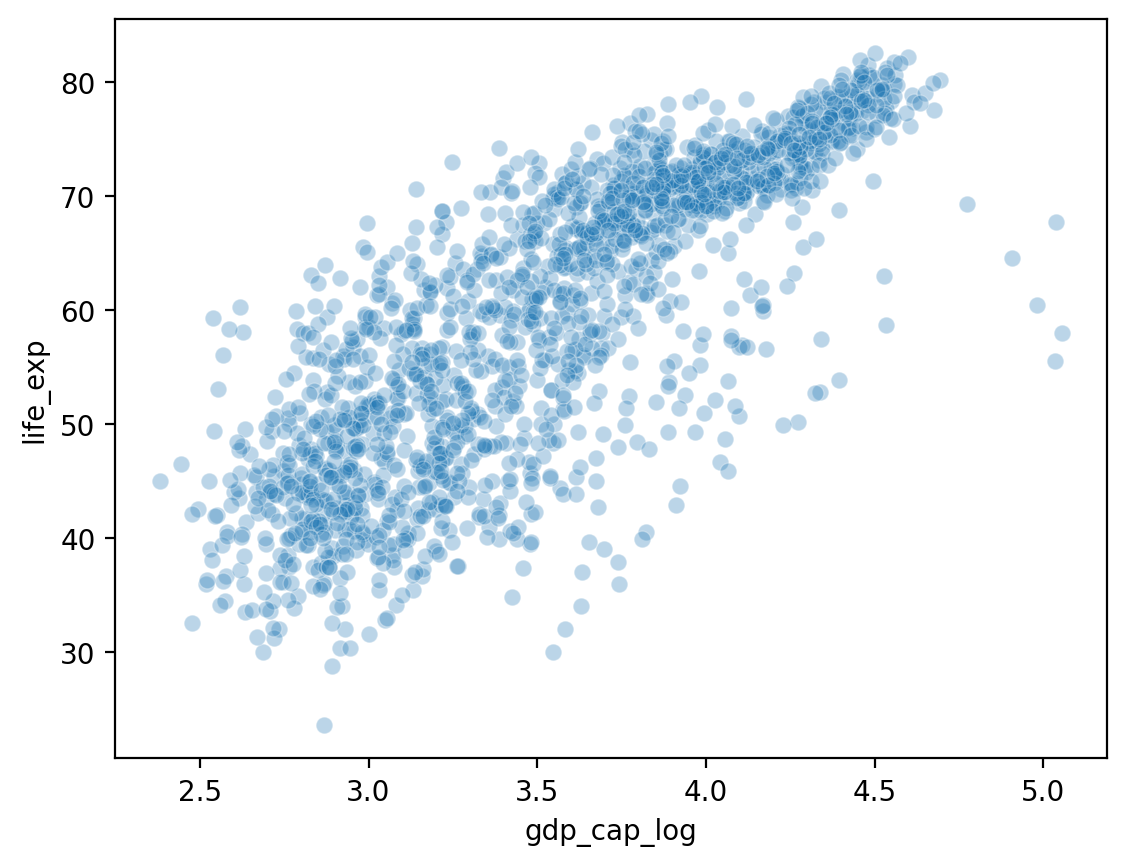

In [12]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder, x = 'gdp_cap_log', y = 'life_exp', alpha = .3);

#### Adding a `hue`

- What if we want to add a *third* component that's categorical, like `continent`?
- `seaborn` allows us to do this with `hue`.

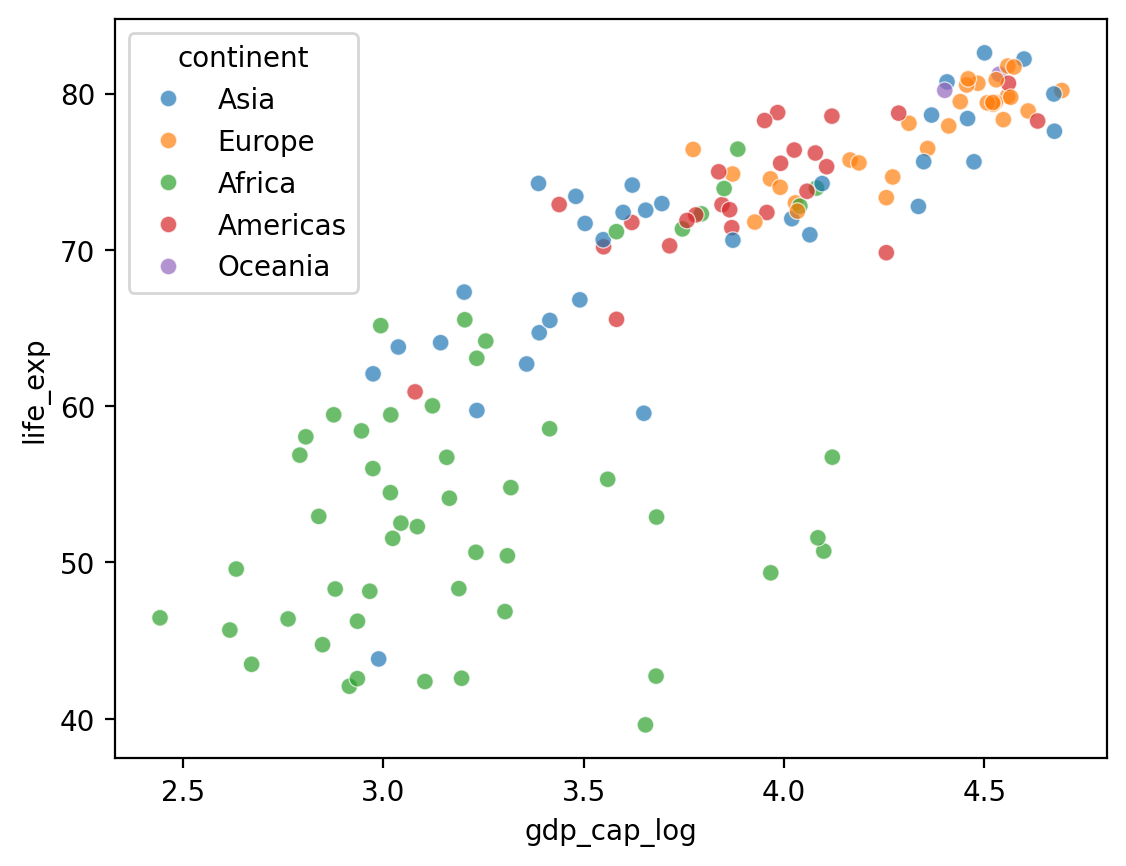

In [13]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp', hue = "continent", alpha = .7);

#### Adding a `size`

- What if we want to add a *fourth* component that's continuous, like `population`?
- `seaborn` allows us to do this with `size`.

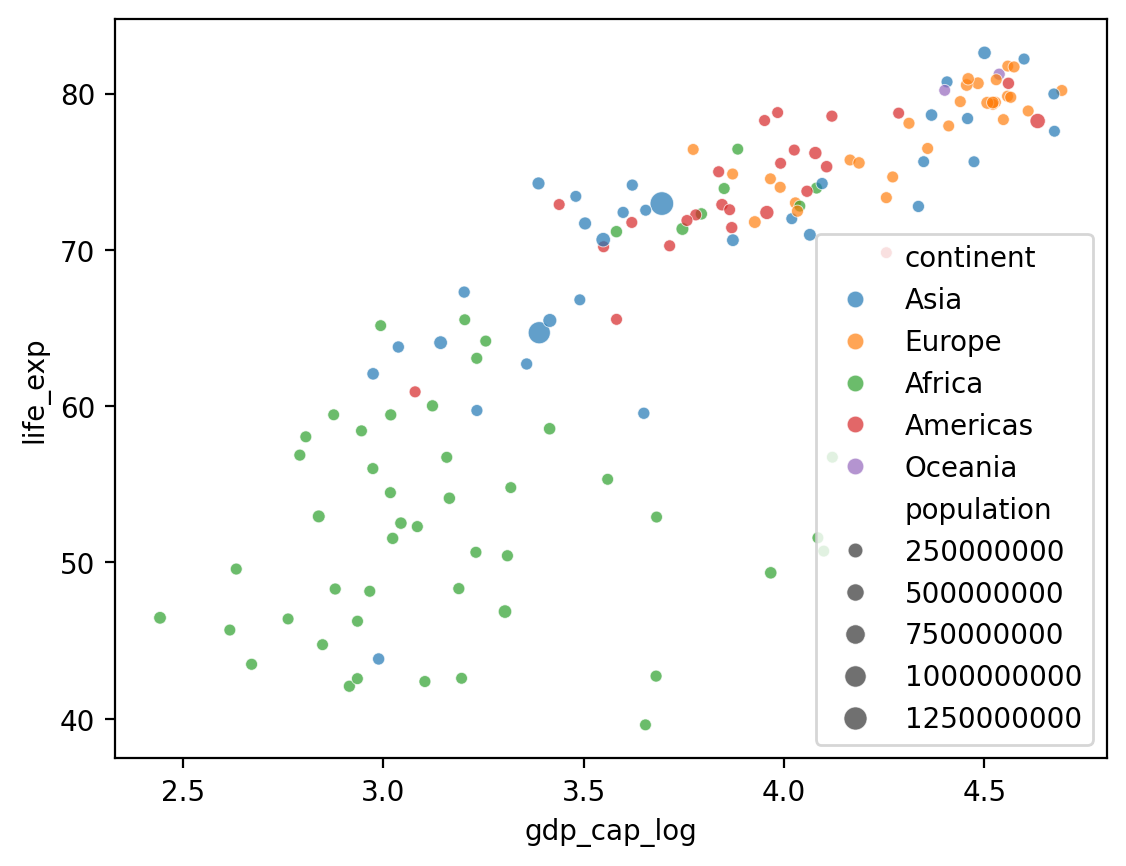

In [14]:
## Log GDP
df_gapminder['gdp_cap_log'] = np.log10(df_gapminder['gdp_cap']) 
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7);

#### Changing the position of the legend

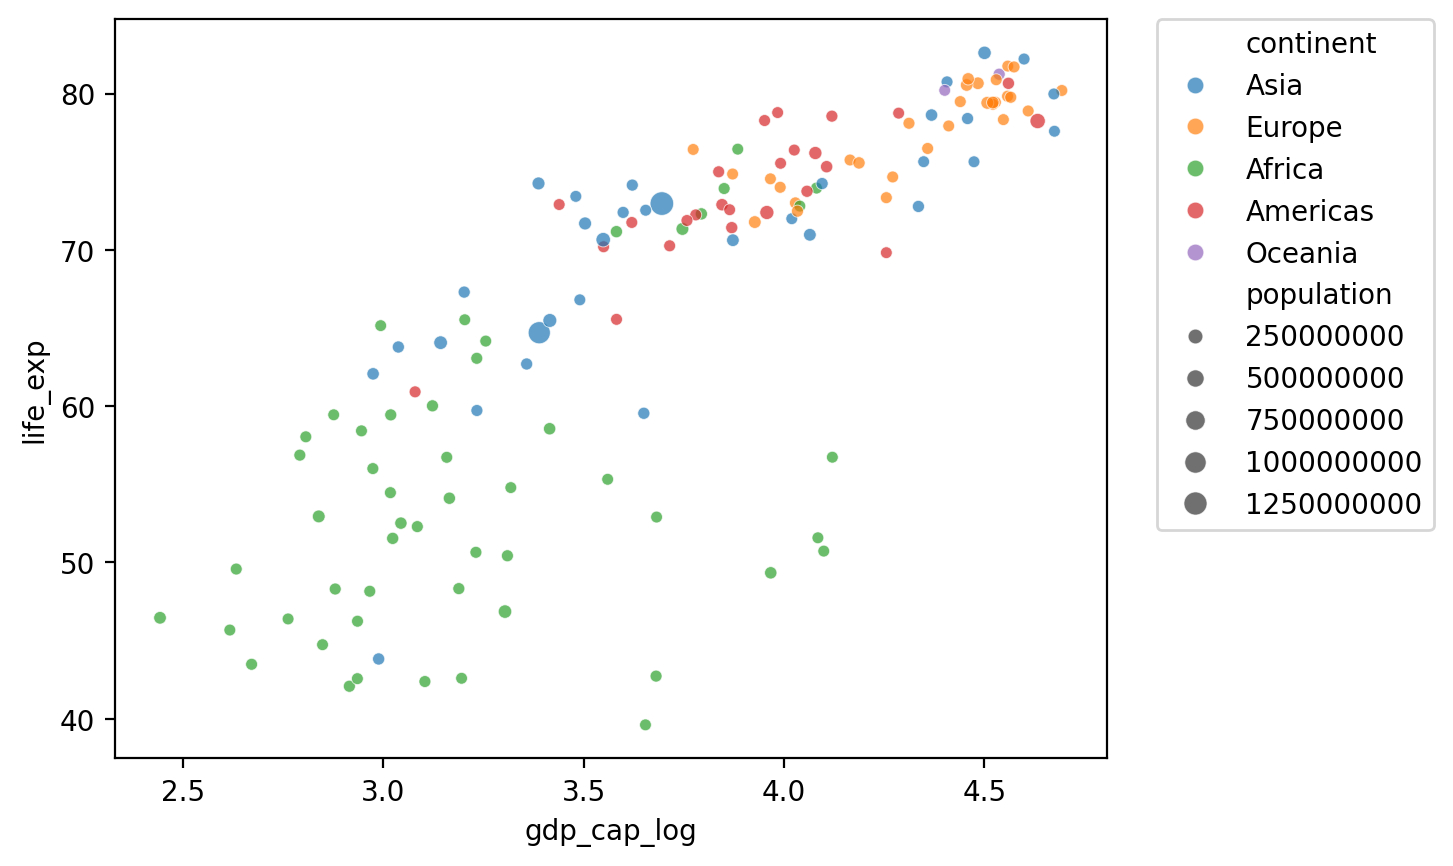

In [14]:
## Show log GDP by life exp
sns.scatterplot(data = df_gapminder[df_gapminder['year'] == 2007],
               x = 'gdp_cap_log', y = 'life_exp',
                hue = "continent", size = 'population', alpha = .7);

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

### Lineplots with `sns.lineplot`

> A **lineplot** also visualizes the relationship between two continuous variables.

- Typically, the position of the line on the `y` axis reflects the *mean* of the `y`-axis variable for that value of `x`.
- Often used for plotting **change over time**.

One way to make a lineplot in `seaborn` is using [`sns.lineplot`](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

#### Showing `life_exp` by `year`

What general trend do we notice?

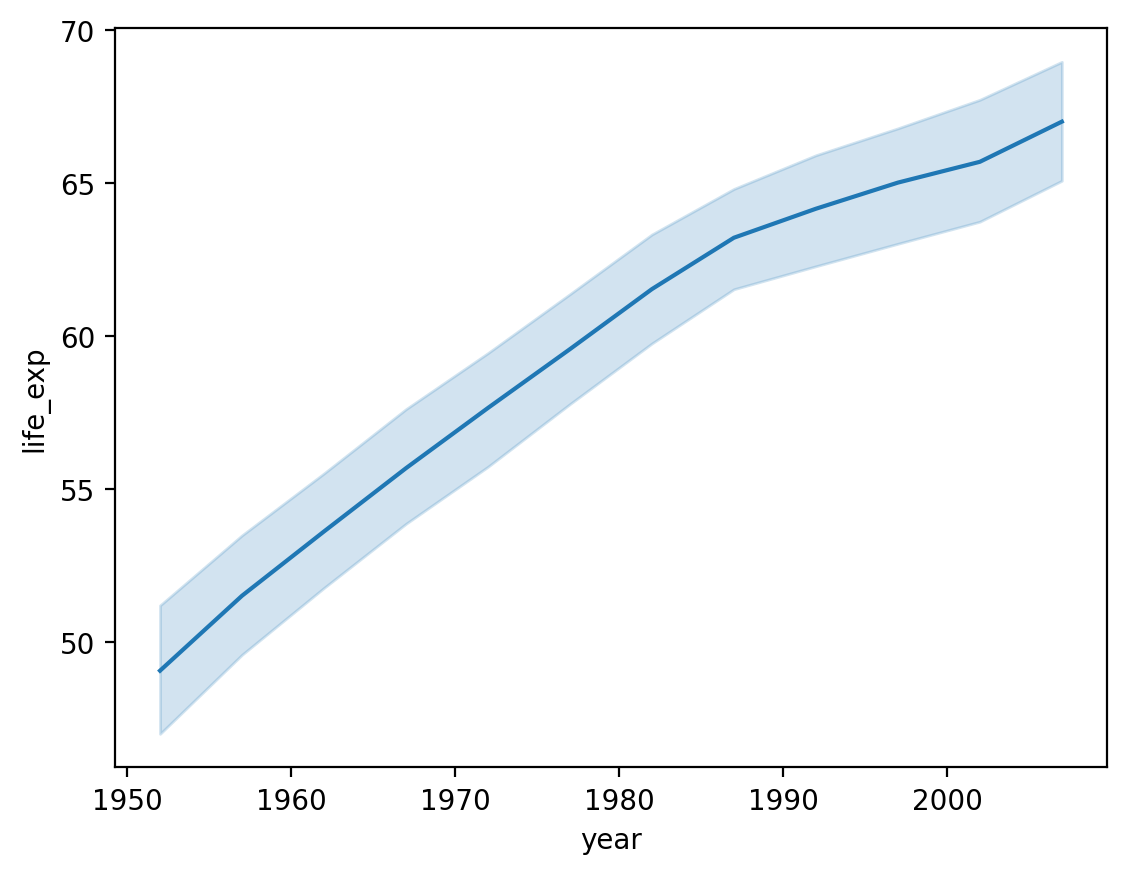

In [15]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp');

#### Modifying how error/uncertainty is displayed

- By default, `seaborn.lineplot` will draw **shading** around the line representing a confidence interval.
- We can change this with `errstyle`.

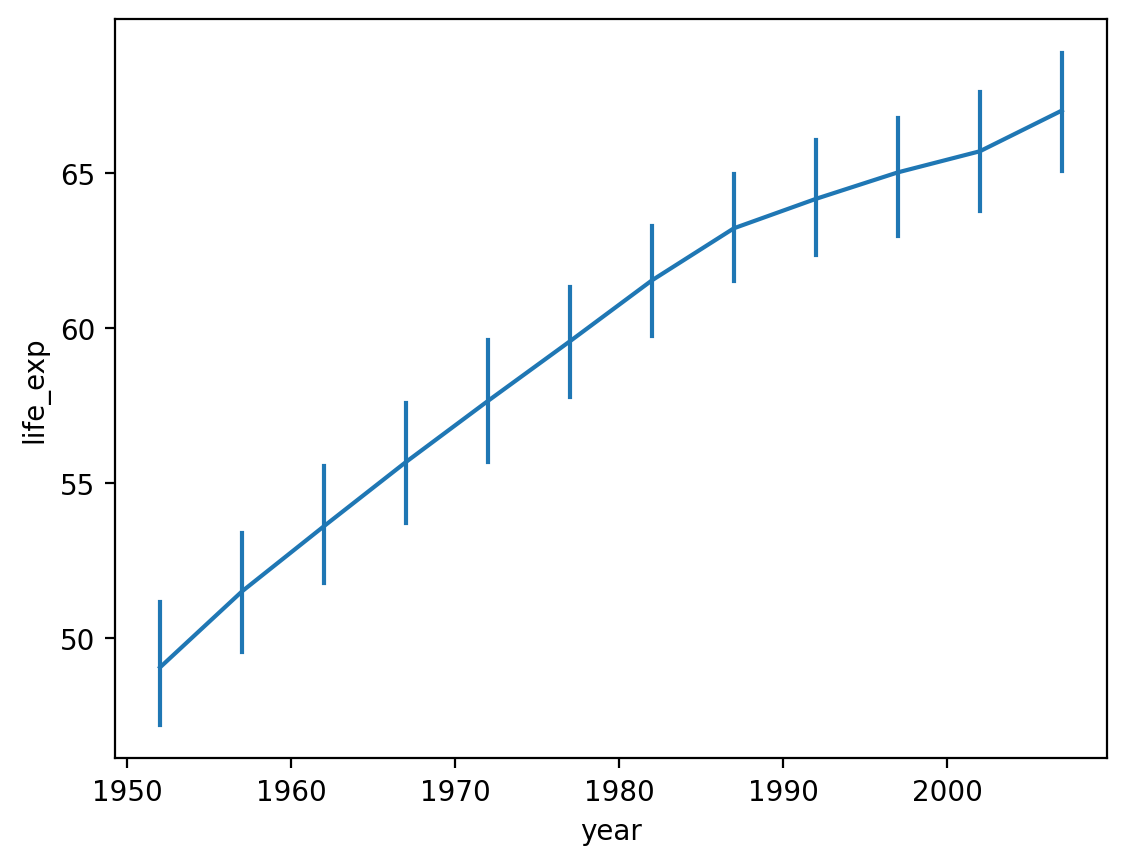

In [16]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            err_style = "bars");

#### Adding a `hue`

- We could also show this by `continent`.  
- There's (fortunately) a positive trend line for each `continent`.

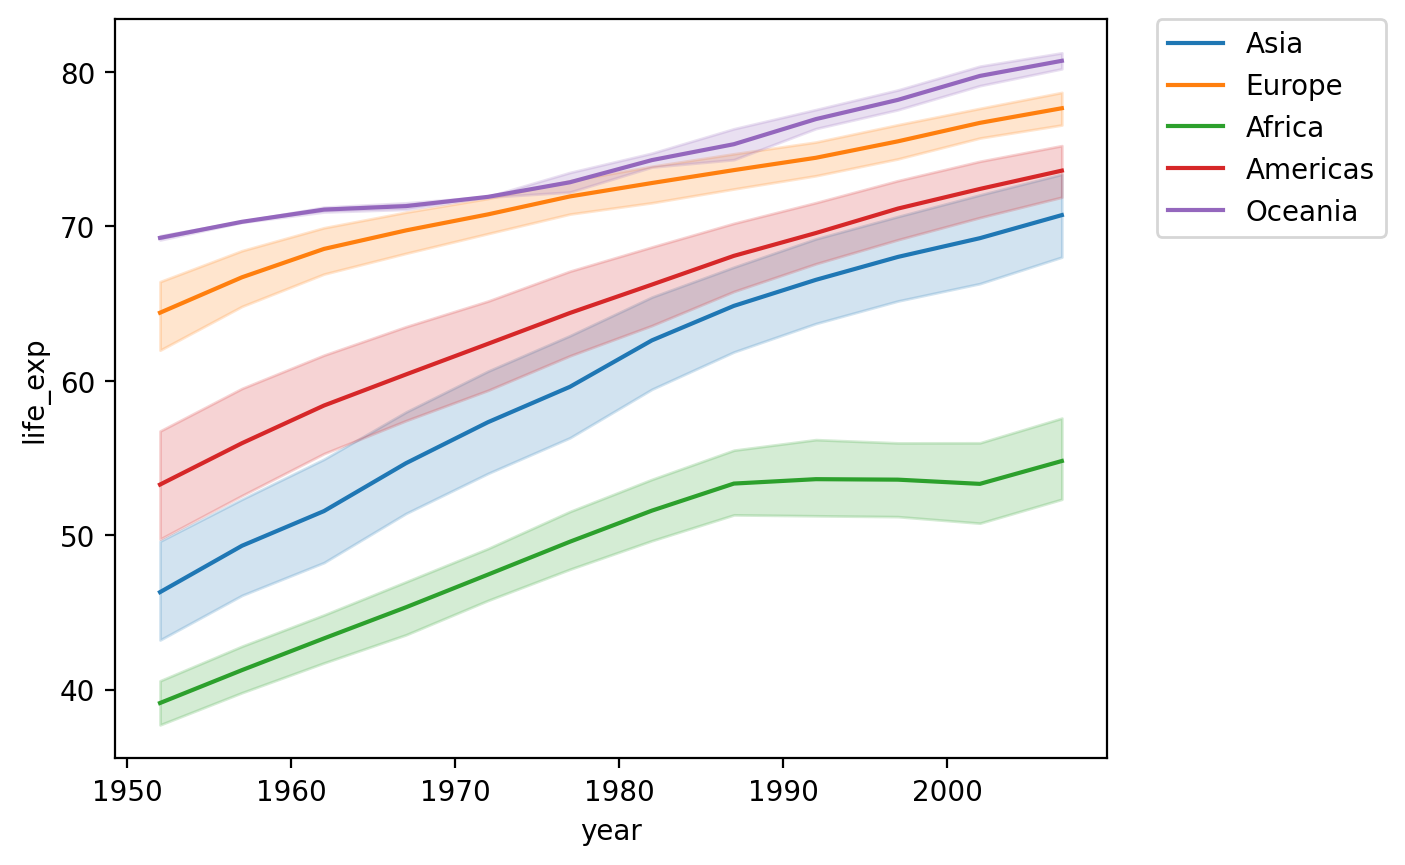

In [17]:
sns.lineplot(data = df_gapminder,
             x = 'year',
             y = 'life_exp',
            hue = "continent")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

#### Check-in

How would you plot the relationship between `year` and `gdp_cap` for countries in the `Americas` only?

In [48]:
### Your code here

#### Heteroskedasticity in `gdp_cap` by `year`

- [**Heteroskedasticity**](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) is when the *variance* in one variable (e.g., `gdp_cap`) changes as a function of another variable (e.g., `year`).
- In this case, why do you think that is?

#### Plotting by country

- There are too many countries to clearly display in the `legend`. 
- But the top two lines are the `United States` and `Canada`.
   - I.e., two countries have gotten much wealthier per capita, while the others have not seen the same economic growth.

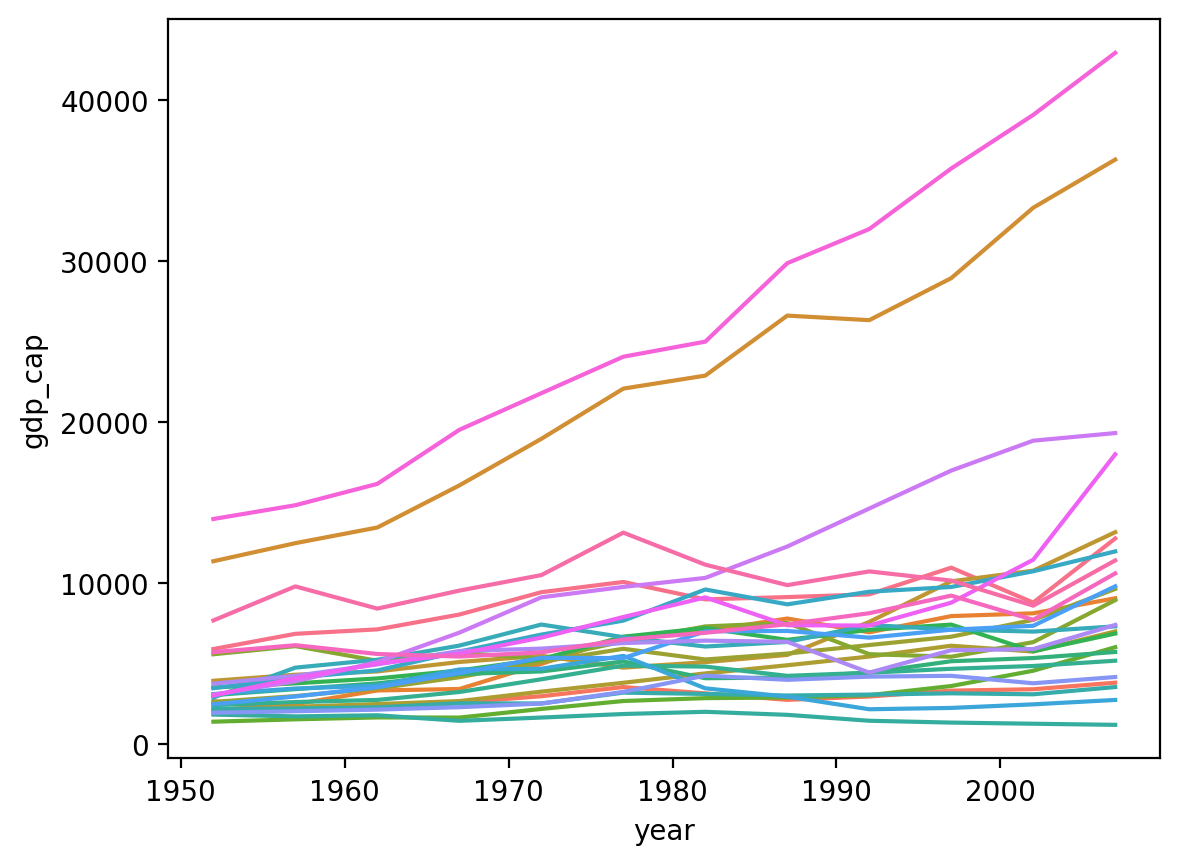

In [18]:
sns.lineplot(data = df_gapminder[df_gapminder['continent']=="Americas"],
             x = 'year', y = 'gdp_cap', hue = "country", legend = None);

### Using `relplot`

- `relplot` allows you to plot either line plots or scatter plots using `kind`.
- `relplot` also makes it easier to `facet` (which we'll discuss momentarily).

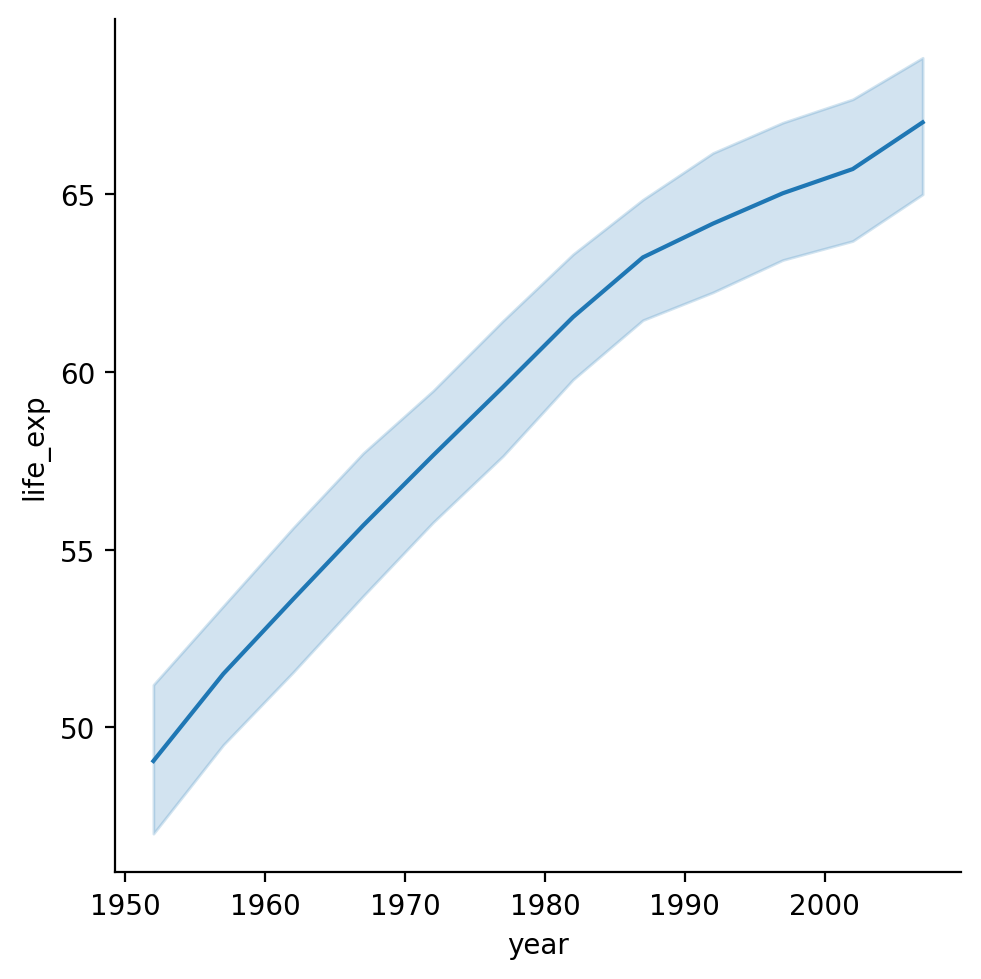

In [20]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line");

#### Faceting into `rows` and `cols`

We can also plot the same relationship across multiple "windows" or **facets** by adding a `rows`/`cols` parameter.

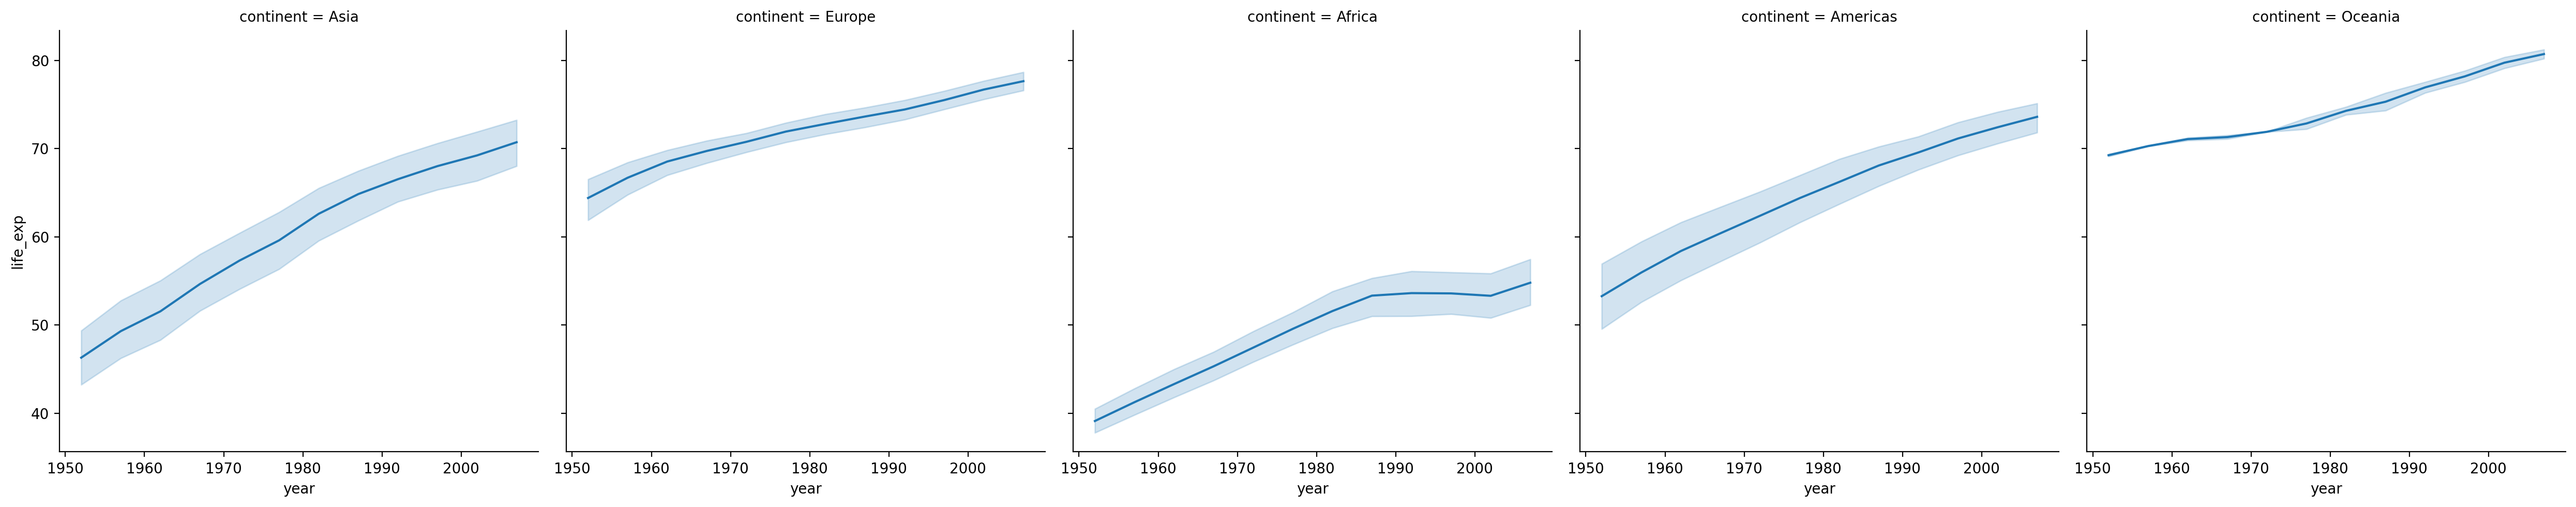

In [23]:
sns.relplot(data = df_gapminder, x = "year", y = "life_exp", kind = "line", 
            col = "continent");

## Bivariate categorical plots

> A **bivariate categorical plot** visualizes the relationship between one categorical variable and one continuous variable.

![title](img/seaborn_catplot.png)

### Example dataset

Here, we'll return to our Pokemon dataset, which has more examples of categorical variables.

In [24]:
df_pokemon = pd.read_csv("data/pokemon.csv")

### Barplots with `sns.barplot`

> A **barplot** visualizes the relationship between one *continuous* variable and a *categorical* variable.

- The *height* of each bar generally indicates the mean of the continuous variable.
- Each bar represents a different *level* of the categorical variable.

With `seaborn`, we can use the function `sns.barplot`.

#### Average `Attack` by `Legendary` status

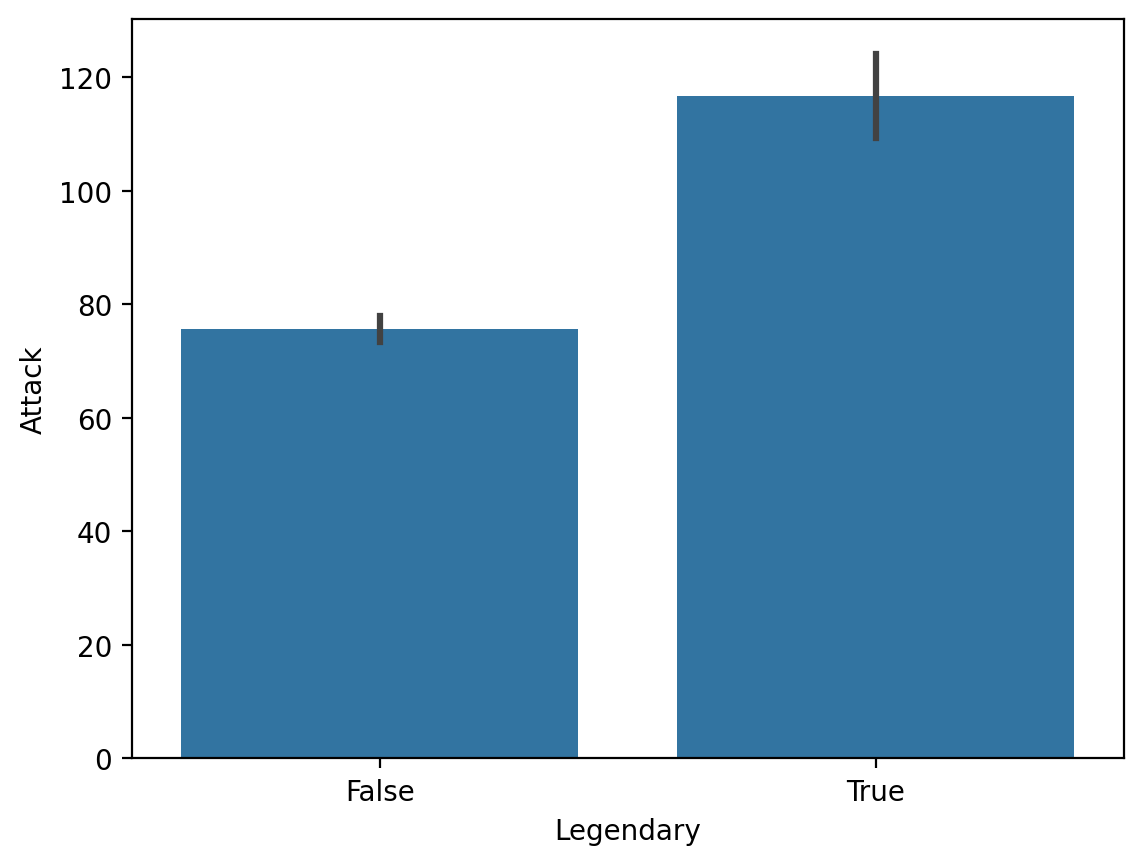

In [25]:
sns.barplot(data = df_pokemon,
           x = "Legendary", y = "Attack");

#### Average `Attack` by `Type 1`

Here, notice that I make the figure *bigger*, to make sure the labels all fit.

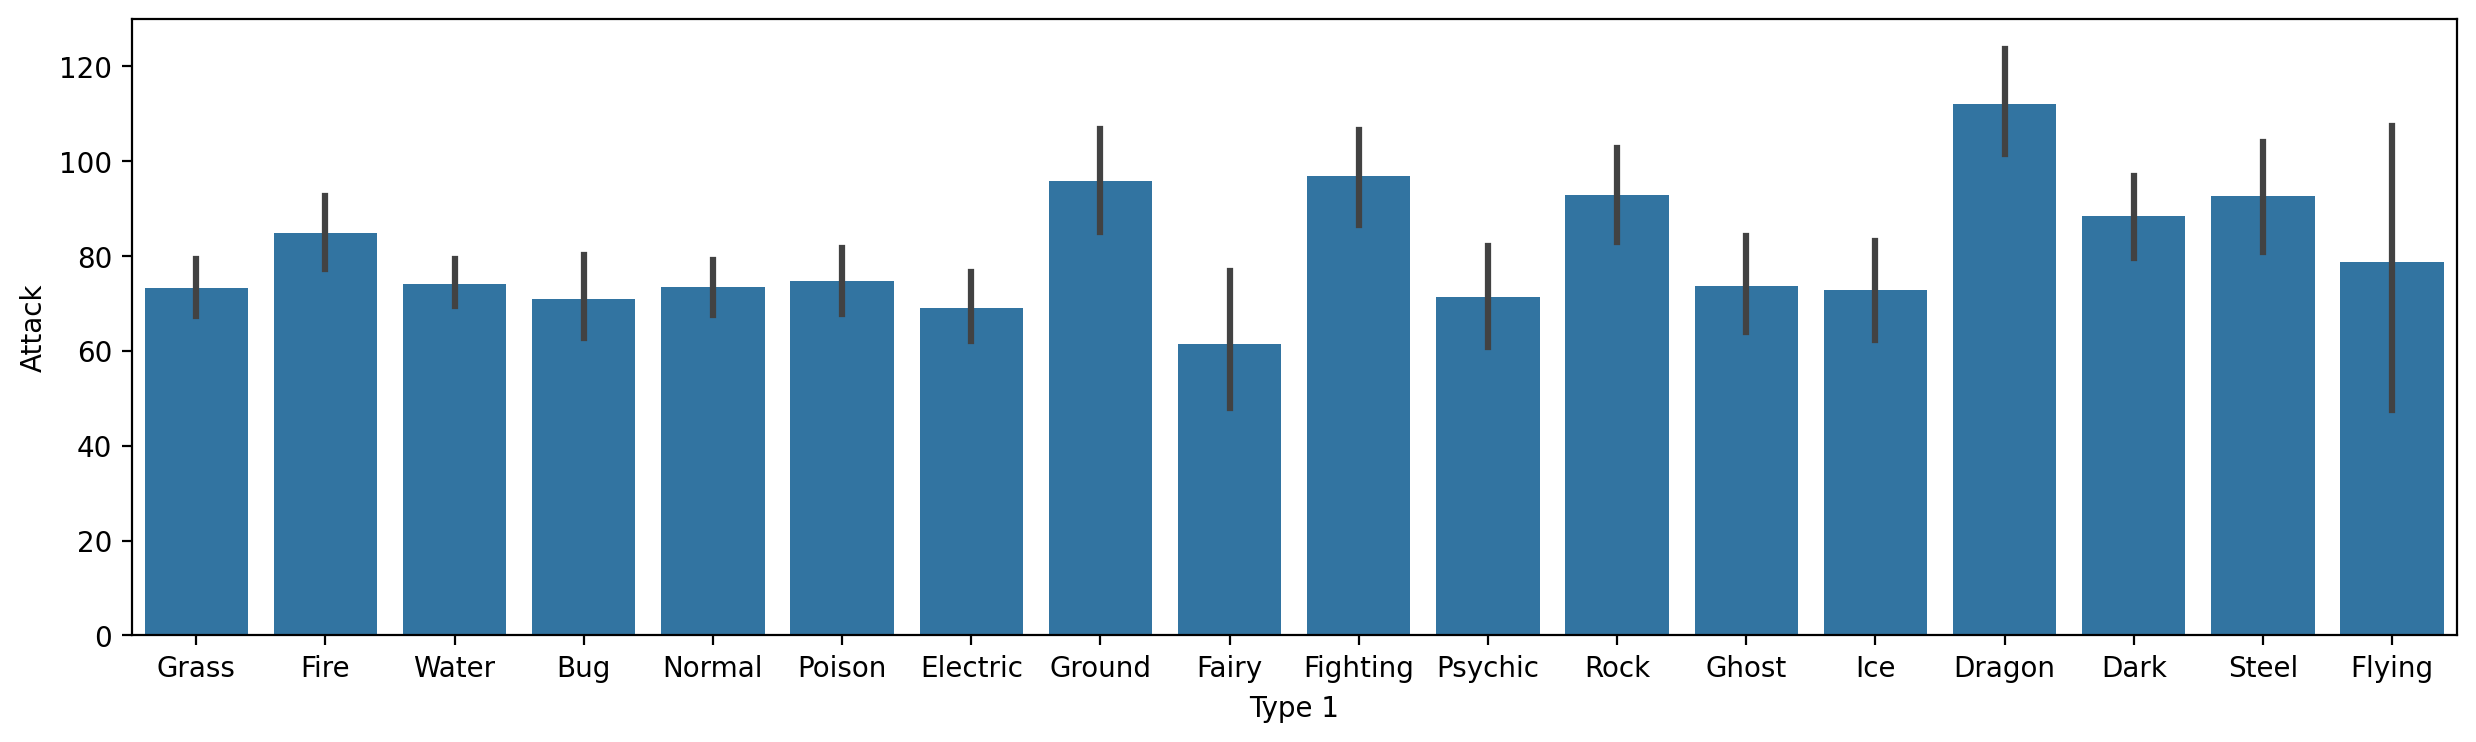

In [26]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "Attack");

#### Check-in

How would you plot `HP` by `Type 1`?

In [56]:
### Your code here

#### Modifying `hue`

As with `scatterplot` and `lineplot`, we can change the `hue` to give further granularity.

- E.g., `HP` by `Type 1`, further divided by `Legendary` status.

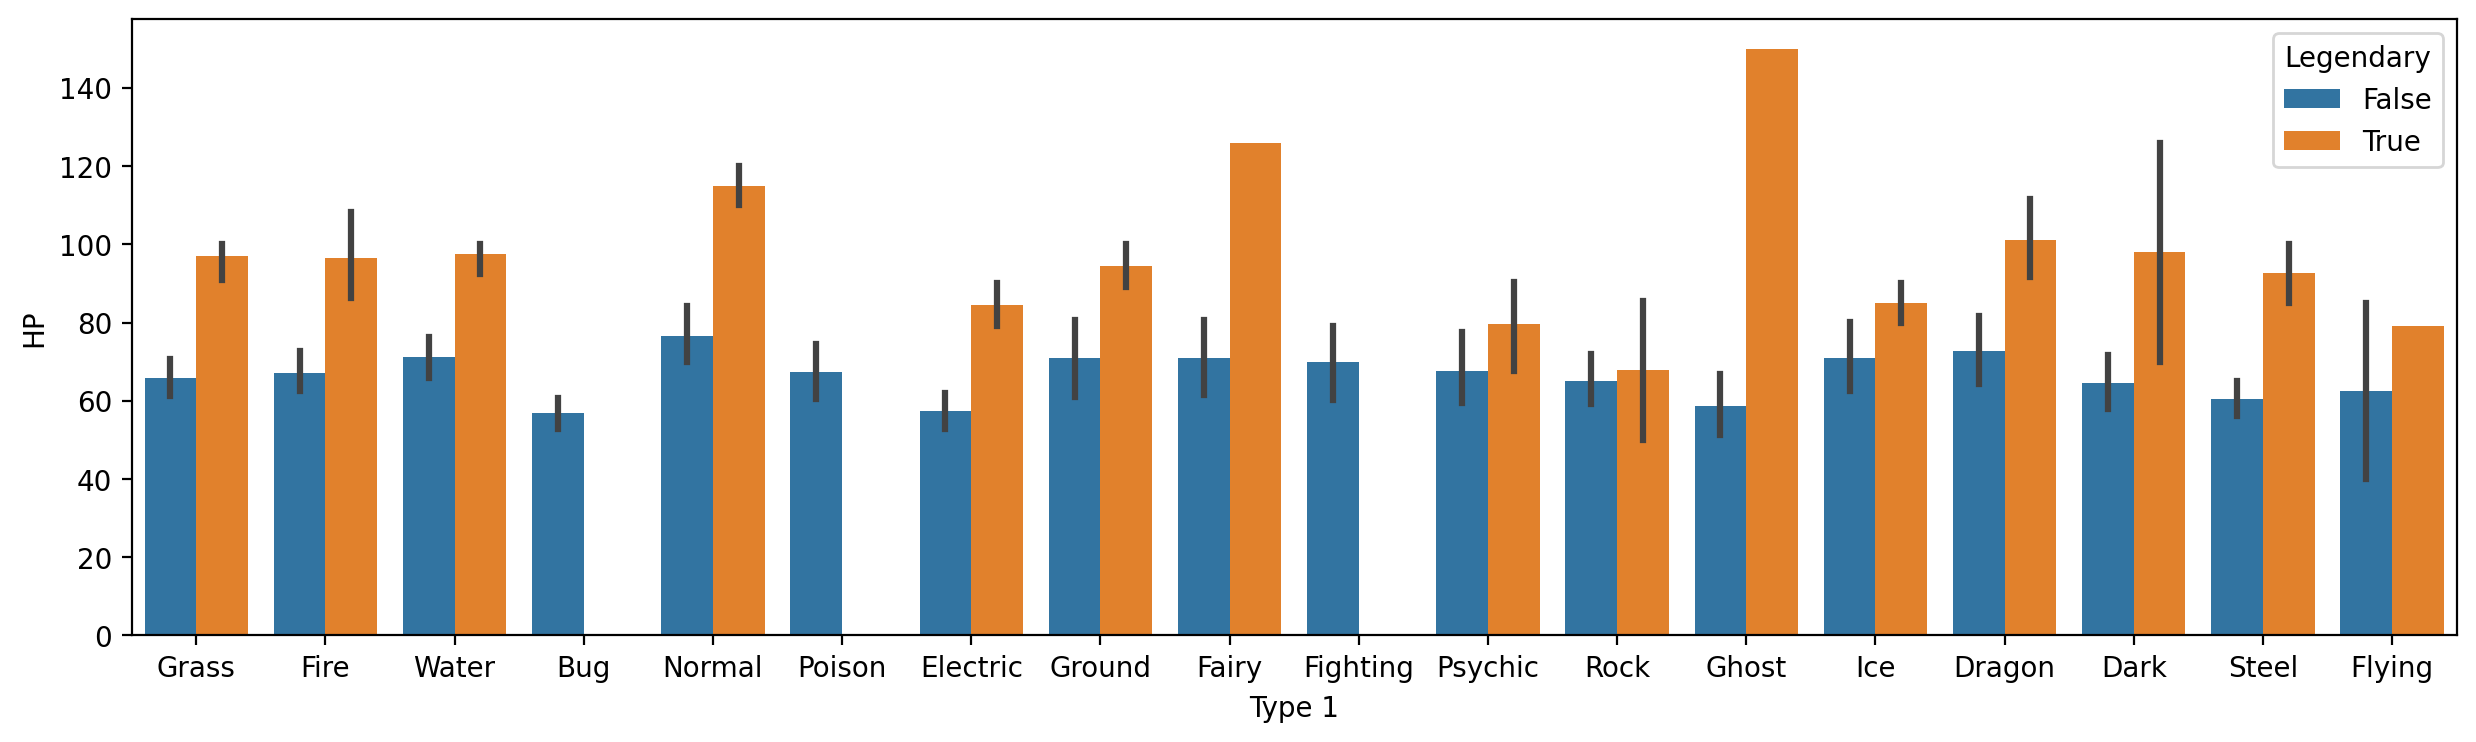

In [26]:
plt.figure(figsize=(15,4))
sns.barplot(data = df_pokemon,
           x = "Type 1", y = "HP", hue = "Legendary");

### Using `catplot`

> `seaborn.catplot` is a convenient function for plotting bivariate categorical data using a range of plot types (`bar`, `box`, `strip`).

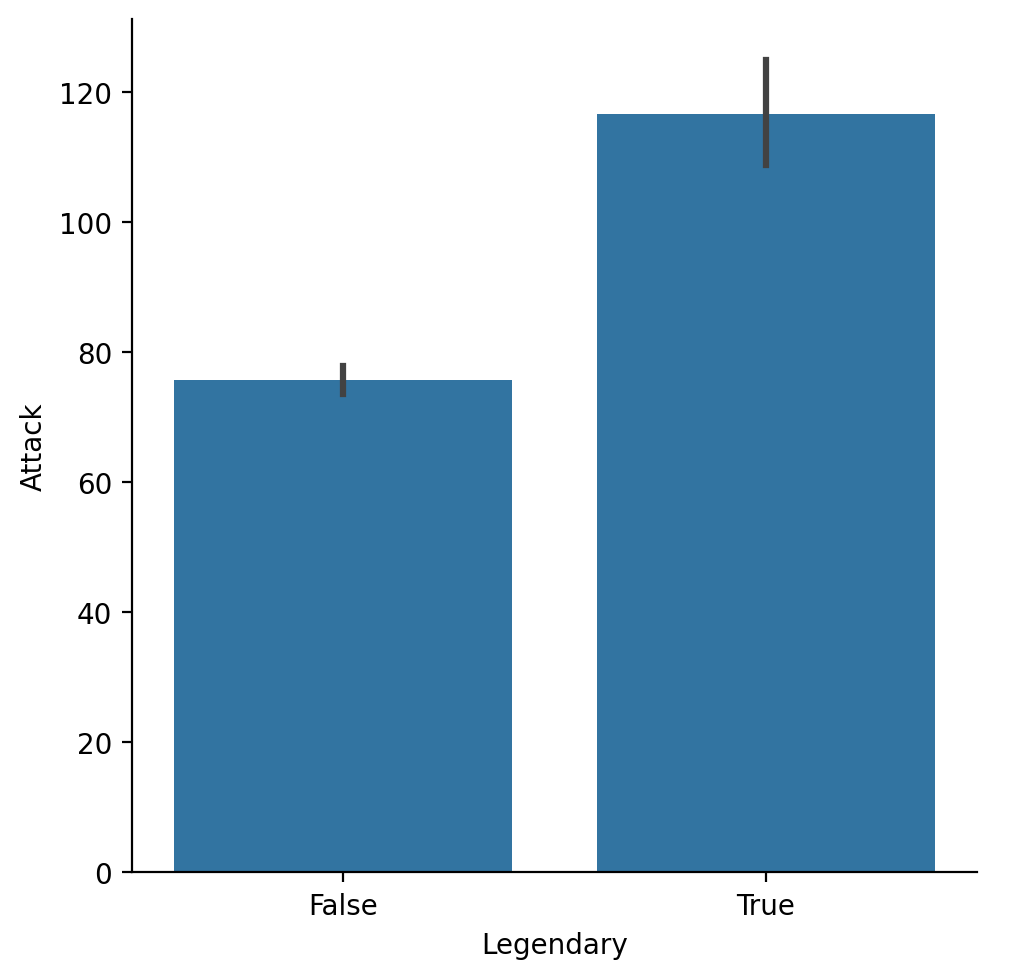

In [27]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "bar");

#### `strip` plots

> A `strip` plot shows each individual point (like a scatterplot), divided by a **category label**.

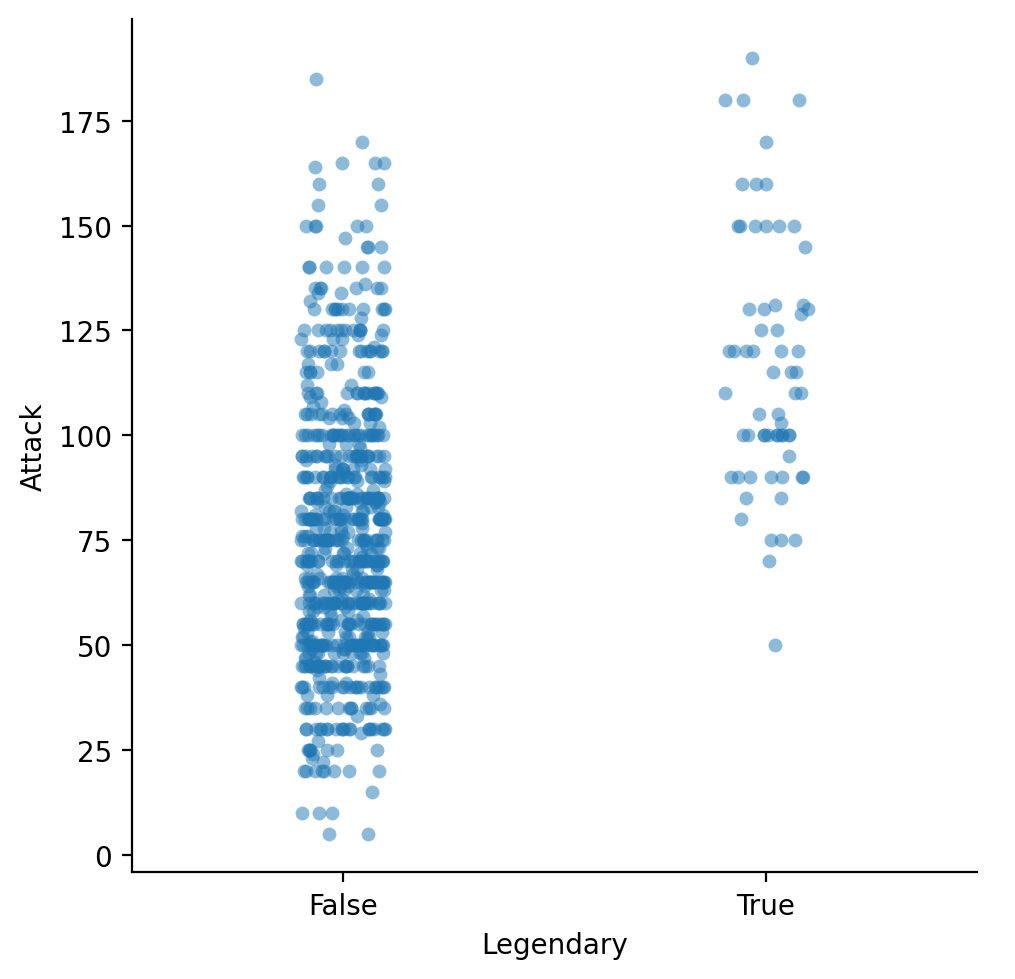

In [28]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .5);

#### Adding a `mean` to our `strip` plot

We can plot *two graphs* at the same time, showing both the individual points and the means.

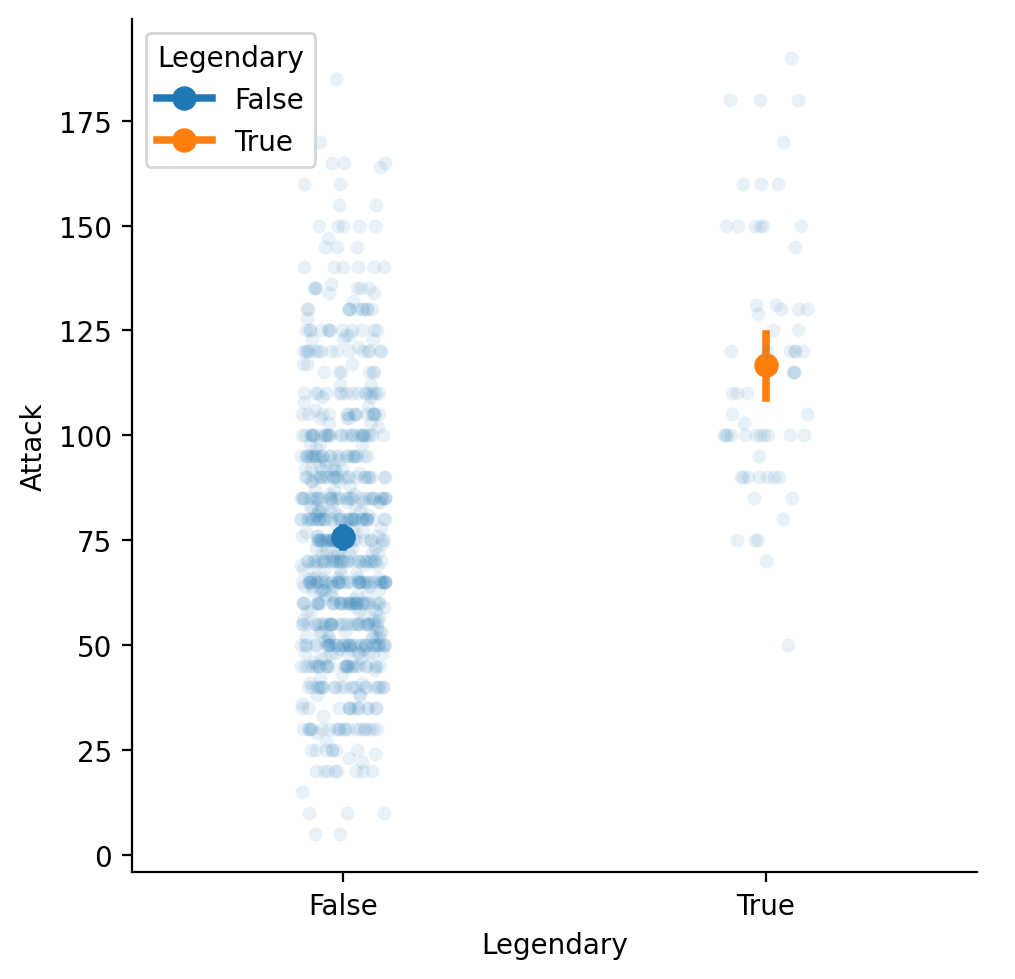

In [30]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "strip", alpha = .1)
sns.pointplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", hue = "Legendary");

#### `box` plots

> A `box` plot shows the interquartile range (the middle 50% of the data), along with the minimum and maximum.

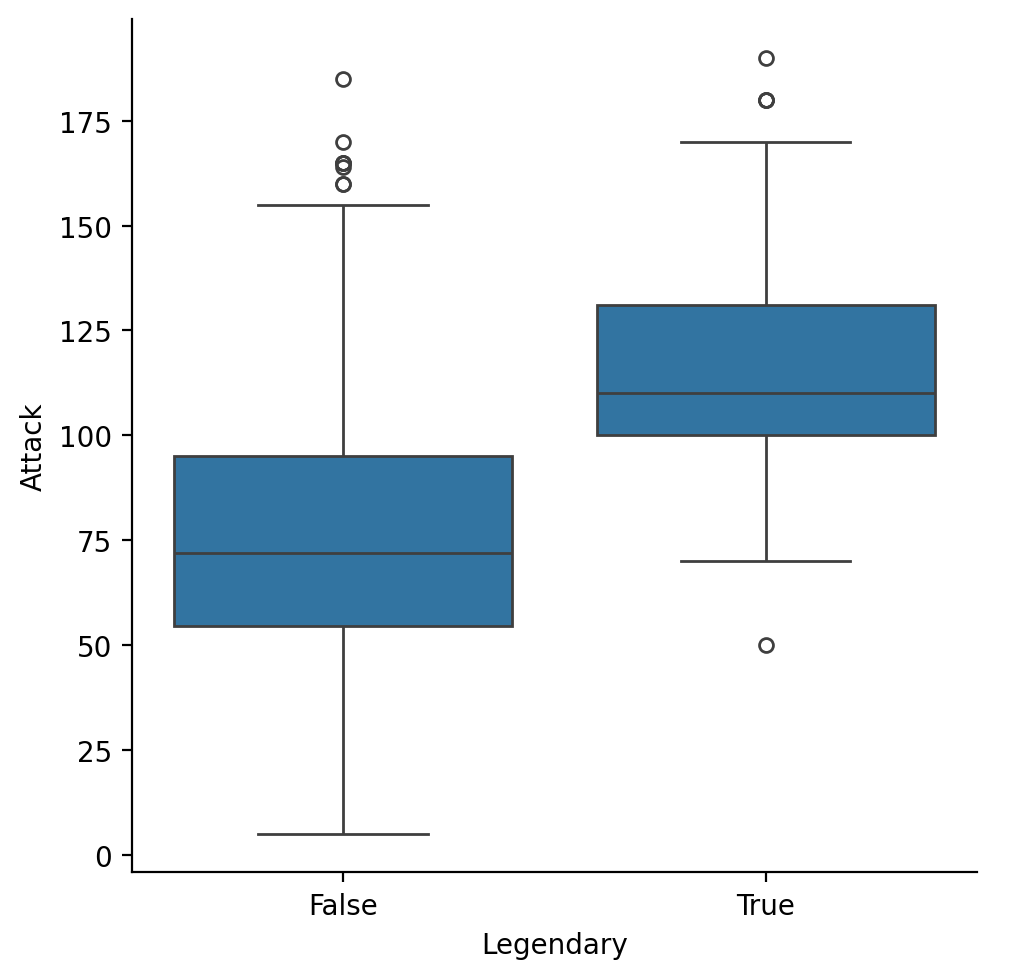

In [31]:
sns.catplot(data = df_pokemon, x = "Legendary", 
             y = "Attack", kind = "box");

Try to consider converting the boxplots into violin plots.

## Conclusion

As with our lecture on `pyplot`, this just scratches the surface.

But now, you've had an introduction to:

- The `seaborn` package.
- Plotting both **univariate** and **bivariate** data.
- Creating plots with multiple layers.